In [118]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [145]:
df=pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


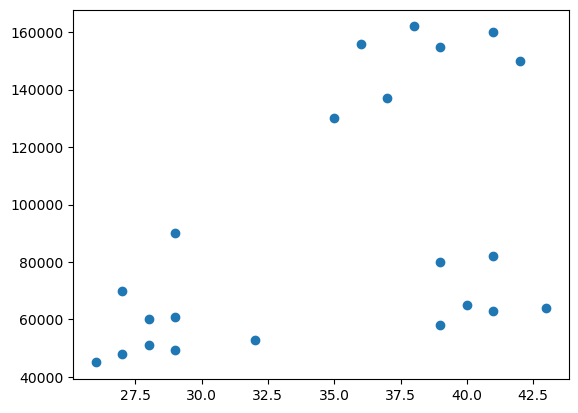

In [146]:
plt.scatter(df.Age,df['Income($)'])

In [147]:
km=KMeans(n_clusters=3)

In [148]:
km

KMeans(n_clusters=3)

In [152]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [153]:
df['cluster']=y_predicted

In [154]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [155]:
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]

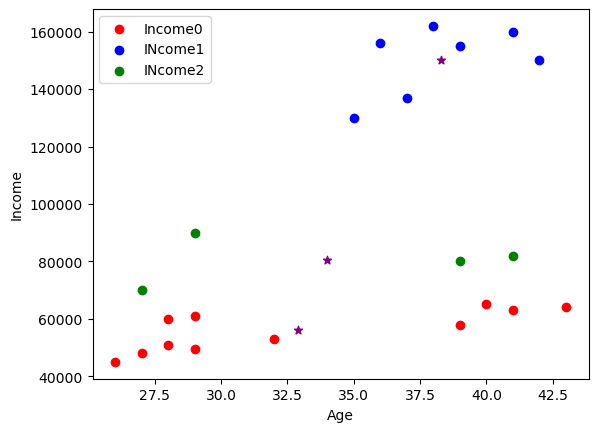

In [158]:
plt.scatter(df0.Age,df0['Income($)'],color='r')
plt.scatter(df1.Age,df1['Income($)'],color='b')
plt.scatter(df2.Age,df2['Income($)'],color='g')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(['Income0','INcome1','INcome2'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')


In [159]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [160]:
df['Income($)']=scaler.transform(df[['Income($)']])

In [162]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [163]:
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [164]:
y_predicted=km.fit_predict(df[['Age','Income($)']])

D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [165]:
df['cluster']=y_predicted

In [166]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,1
1,Michael,29,0.384615,1
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,2


In [168]:
km.cluster_centers_

array([[35.        ,  0.63247863],
       [27.875     ,  0.12232906],
       [40.3       ,  0.5034188 ]])

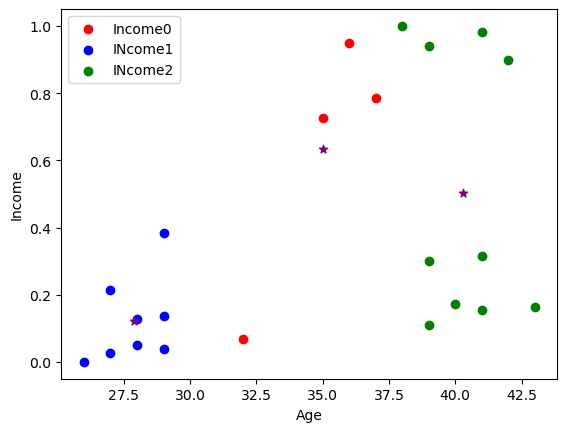

In [169]:
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]
plt.scatter(df0.Age,df0['Income($)'],color='r')
plt.scatter(df1.Age,df1['Income($)'],color='b')
plt.scatter(df2.Age,df2['Income($)'],color='g')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(['Income0','INcome1','INcome2'])

In [170]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [171]:
sse

[734.1763833270242,
 92.54628677464531,
 48.09800321223042,
 32.74501343333252,
 17.61742594418876,
 10.600399347407894,
 8.254870090340177,
 6.447014634621473,
 5.129465264080649]

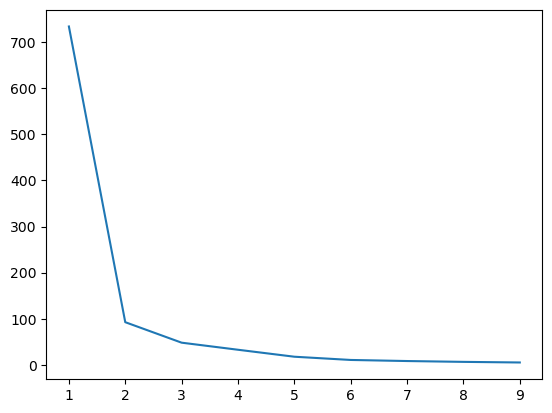

In [172]:
plt.plot(k_rng,sse)